In [1]:
'''This code uses an ANN to predict outcomes of AFL matches in 2018 based on player data from 2012-2017.'''
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime

In [ ]:
afl = pd.read_csv('C:/path/to/your/csv/file.csv')

In [2]:
afl = pd.read_csv('C:/Users/the_n/OneDrive/Documents/Coding/stats.csv')

In [4]:
afl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63712 entries, 0 to 63711
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    63712 non-null  object 
 1   Player                  63712 non-null  object 
 2   D.O.B                   63712 non-null  object 
 3   Height                  63712 non-null  int64  
 4   Weight                  63712 non-null  int64  
 5   Position                63712 non-null  object 
 6   Season                  63712 non-null  int64  
 7   Round                   63712 non-null  object 
 8   Date                    63624 non-null  object 
 9   Score                   63624 non-null  float64
 10  Margin                  63624 non-null  float64
 11  WinLoss                 63624 non-null  object 
 12  Opposition              63624 non-null  object 
 13  Venue                   63624 non-null  object 
 14  Disposals               63712 non-null

In [5]:
afl = afl.dropna(axis=0)
afl = afl[afl['WinLoss'] != 'D']
afl['D.O.B'] = pd.to_datetime(afl['D.O.B'])
afl['Date'] = pd.to_datetime(afl['Date'])
age_in_days = (afl['Date']-afl['D.O.B'])
age_in_years = age_in_days.dt.days/365.2425
afl['Age'] = age_in_years

In [6]:
grouped_data = afl.groupby(['Team','Season','Round','WinLoss','Opposition','Venue'])['Player'].apply(list).reset_index()
grouped_data = grouped_data.to_numpy()

In [7]:
grouped_data[0]

array(['Adelaide', 2012, 'PF', 'L', 'Hawthorn', 'M.C.G.',
       list(['Callinan, Ian', 'Dangerfield, Patrick', 'Doughty, Michael', 'Douglas, Richard', 'Henderson, Ricky', 'Jacobs, Sam', 'Johncock, Graham', 'Mackay, David', 'Otten, Andy', 'Petrenko, Jared', 'Porplyzia, Jason', 'Reilly, Brent', 'Rutten, Ben', 'Sloane, Rory', 'Smith, Brodie', 'Thompson, Luke', 'Thompson, Scott', 'Tippett, Kurt', 'Vince, Bernie', 'Walker, Taylor', 'Wright, Matthew', 'van Berlo, Nathan'])],
      dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct1 = ColumnTransformer([('encoder',OneHotEncoder(),[3,4,5])], remainder='passthrough',sparse_threshold=0)
grouped_data = ct1.fit_transform(grouped_data)

In [9]:
grouped_data[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 'Adelaide', 2012, 'PF',
       list(['Callinan, Ian', 'Dangerfield, Patrick', 'Doughty, Michael', 'Douglas, Richard', 'Henderson, Ricky', 'Jacobs, Sam', 'Johncock, Graham', 'Mackay, David', 'Otten, Andy', 'Petrenko, Jared', 'Porplyzia, Jason', 'Reilly, Brent', 'Rutten, Ben', 'Sloane, Rory', 'Smith, Brodie', 'Thompson, Luke', 'Thompson, Scott', 'Tippett, Kurt', 'Vince, Bernie', 'Walker, Taylor', 'Wright, Matthew', 'van Berlo, Nathan'])],
      dtype=object)

In [10]:
training = [x for x in grouped_data if x[43]<2018]
test = [x for x in grouped_data if x[43]==2018]

In [11]:
y_train = np.array([x[0] for x in training])
y_train = y_train.reshape(-1,1)
y_test = np.array([x[0] for x in test])
y_test = y_test.reshape(-1,1)

In [12]:
print(y_train)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [13]:
# player_stats is each players' average stats between 2012 and 2017.
player_stats = afl[afl['Season'] < 2018].groupby('Player',sort=False).mean()
player_stats = player_stats.reset_index()
player_stats = player_stats.drop(['Height','Weight','Season','BrownlowVotes','Score','Margin'],axis=1)
player_stats = player_stats.to_numpy()

# Player average stats for 2018
player_stats_2018 = afl[afl['Season'] == 2018].groupby('Player',sort=False).mean()
player_stats_2018 = player_stats_2018.reset_index()
player_stats_2018 = player_stats_2018.drop(['Height','Weight','Season','BrownlowVotes','Score','Margin'],axis=1)
player_stats_2018 = player_stats_2018.to_numpy()

In [14]:
player_stats[0]

array(['Atkins, Rory', 19.910714285714285, 11.053571428571429,
       4.357142857142857, 8.857142857142858, 0.4642857142857143,
       0.35714285714285715, 0.10714285714285714, 1.8928571428571428,
       1.8392857142857142, 3.482142857142857, 1.8392857142857142,
       2.607142857142857, 0.4107142857142857, 0.75, 6.142857142857143,
       13.982142857142858, 0.30357142857142855, 0.3392857142857143,
       1.2321428571428572, 0.7678571428571429, 0.625, 78.32142857142857,
       22.247987882805838], dtype=object)

In [12]:
len(player_stats)

1145

In [15]:
# Include opposition and venue in features
opp_teams_train = np.array([x[2:42] for x in training])
opp_teams_test = np.array([x[2:42] for x in test])

In [16]:
opp_teams_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0], dtype=object)

In [17]:
X_train = [0]*len(training)
for i in range(0,len(training)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats)):
        if player_stats[j][0] in training[i][-1]:
            player_list.append(player_stats[j][1:])
    X_train[i] = player_list
    
X_train = [np.concatenate(x) for x in X_train]

In [30]:
print(len(X_train[0]))
X_train[0]

506


array([20.346774193548388, 12.725806451612904, 3.4919354838709675,
       7.620967741935484, 0.6693548387096774, 0.5645161290322581,
       0.06451612903225806, 3.870967741935484, 1.314516129032258,
       4.306451612903226, 3.661290322580645, 2.4274193548387095, 1.0,
       0.9435483870967742, 8.435483870967742, 11.85483870967742,
       0.22580645161290322, 0.5161290322580645, 1.3951612903225807,
       0.532258064516129, 0.7661290322580645, 81.44354838709677,
       27.993200275468777, 14.18978102189781, 8.021897810218977,
       3.7664233576642334, 6.1678832116788325, 0.2846715328467153,
       0.24817518248175183, 33.91970802919708, 2.065693430656934,
       1.0656934306569343, 1.9562043795620438, 2.335766423357664,
       1.8832116788321167, 0.8905109489051095, 0.7956204379562044,
       6.189781021897811, 7.956204379562044, 0.9124087591240876,
       0.27007299270072993, 2.627737226277372, 0.021897810218978103,
       0.3722627737226277, 85.94890510948905, 26.694953043146167,
  

In [19]:
X_test = [0]*len(test)
for i in range(0,len(test)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats_2018)):
        if player_stats_2018[j][0] in test[i][-1]:
            player_list.append(player_stats_2018[j][1:])
    X_test[i] = player_list
    
X_test = [np.concatenate(x) for x in X_test]

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [19]:
len(X_test)

408

In [21]:
scaled_X_train = np.hstack((scaled_X_train, opp_teams_train))
scaled_X_test = np.hstack((scaled_X_test, opp_teams_test))

In [22]:
scaled_X_train = np.asarray(scaled_X_train).astype(np.float32)
scaled_X_test = np.asarray(scaled_X_test).astype(np.float32)

In [23]:
print(scaled_X_train[0])

[ 6.18809342e-01  1.21086979e+00 -6.62710309e-01  2.24780035e-03
 -1.99093353e-02  2.76421607e-01 -2.37170607e-01  5.80942214e-01
 -1.59369335e-01  1.61617553e+00  1.15693474e+00  4.88989621e-01
  5.73852718e-01  5.92228711e-01  8.38677347e-01  3.50265175e-01
 -5.74591875e-01 -1.45324454e-01 -3.24574262e-01  1.82839751e-01
  1.12314725e+00 -6.65854588e-02  1.48138237e+00 -4.98186707e-01
 -4.20792162e-01 -2.46276647e-01 -4.70008254e-01 -6.96794450e-01
 -6.69697583e-01  4.98701954e+00 -8.92397702e-01 -3.31930578e-01
 -4.39176649e-01  2.88001388e-01 -4.91637856e-01  8.16050619e-02
 -1.67277917e-01 -1.78655699e-01 -6.01860940e-01  8.02277267e-01
 -6.12190485e-01  3.75586897e-01 -9.59012747e-01 -3.23338598e-01
  6.65037215e-01  6.78989708e-01 -1.08733557e-01 -2.03033388e-01
 -1.09663534e+00  5.59475785e-03 -6.64329171e-01 -4.20438260e-01
 -2.77306497e-01  5.41319668e-01  3.00944179e-01  1.83034271e-01
 -3.76473665e-01 -5.24111450e-01 -4.81638700e-01 -4.90642488e-01
 -4.64239508e-01  2.39514

In [63]:
# Build the ANN
ann = tf.keras.models.Sequential()
# First layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
# Second layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
# Output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [64]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
steps = []
accs = []
test_accs = []

for i in range(0, 25):
    ann.fit(scaled_X_train, y_train, epochs = 1)
    [loss, accuracy] = ann.evaluate(scaled_X_train, y_train)
    [loss_t, accuracy_t] = ann.evaluate(scaled_X_test, y_test)
    accs.append(accuracy), steps.append(i), test_accs.append(accuracy_t)

13/13 [==============================] - 0s 537us/step - loss: 0.8956 - accuracy: 0.5809


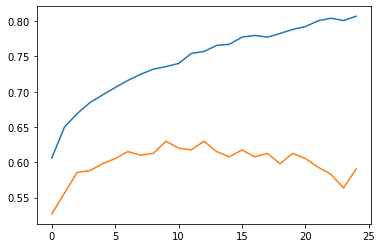

In [62]:
import matplotlib.pyplot as plt
plt.plot(steps, accs)
plt.plot(steps, test_accs)

In [47]:
y_pred = ann.predict(scaled_X_test)

In [48]:
y_pred

array([[0.6913418 ],
       [0.44829708],
       [0.59492993],
       [0.65300065],
       [0.4223319 ],
       [0.4143241 ],
       [0.15169099],
       [0.41322654],
       [0.05673802],
       [0.21605965],
       [0.7085784 ],
       [0.03070465],
       [0.2955696 ],
       [0.00478819],
       [0.00337926],
       [0.3259145 ],
       [0.33356506],
       [0.3282336 ],
       [0.27411434],
       [0.33356506],
       [0.43759742],
       [0.16658884],
       [0.9472754 ],
       [0.489399  ],
       [0.8749249 ],
       [0.981809  ],
       [0.9689517 ],
       [0.34634256],
       [0.13662866],
       [0.611145  ],
       [0.45109048],
       [0.9599432 ],
       [0.45901597],
       [0.4377189 ],
       [0.6704484 ],
       [0.6435526 ],
       [0.9982467 ],
       [0.44827214],
       [0.31795084],
       [0.7852206 ],
       [0.83350784],
       [0.4675299 ],
       [0.45109048],
       [0.53066957],
       [0.971976  ],
       [0.998333  ],
       [0.9995004 ],
       [0.971

In [49]:
y_pred1 = [1 if x>=0.5 else 0 for x in y_pred]

In [50]:
y_pred1

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

0.5980392156862745
